In [36]:
import pandas as pd, numpy as np
import micom, cobra
from micom import Community
import itertools

# data

## diet

In [37]:
diet_file = "C:/Users/sabh/Desktop/jd_thesis/data/Magnusdottir_2017_TableS12_diets.csv"
diet = pd.read_csv(diet_file)
diet.head()

,metabolite_ID,Exchange_reaction,metabolite_name,western,high_fiber
0,arab_L,EX_arab_L(e),L-arabinose,0.178783,0.047368
1,cellb,EX_cellb(e),Cellobiose,0.074493,0.019737
2,drib,EX_drib(e),2-deoxy-D-ribose,0.178783,0.047368
3,fru,EX_fru(e),D-Fructose,0.148986,0.039474
4,fuc_L,EX_fuc_L(e),L-fucose,0.148986,0.039474


In [38]:
western_dict  = dict(zip(diet['Exchange_reaction'], diet['western']))
high_fib = dict(zip(diet['Exchange_reaction'], diet['high_fiber']))

In [39]:
western_dict = {key.replace('(e)', '_m'): value for key, value in western_dict.items()}
high_fib = {key.replace('(e)', '_m'): value for key, value in high_fib.items()}

## models

In [40]:
# micom needs a df input : index(numerical index), id(name), file(modelpath)
# models_df = pd.DataFrame()

# Define paths
models_dir = "C:/Users/sabh/Desktop/comets100_pr/models_agora2/"
modelsfile = "C:/Users/sabh/Desktop/jd_thesis/data/models100 - Copy.txt"

# Variables for DataFrame
index_list = []
id_list = []
file_list = []
meta_dict = {}

linesnum = 1
with open(modelsfile, 'r') as file:
    for line in file:
        model = line.strip()
        model_path = models_dir + model + '.xml'
        meta_dict[linesnum] = model
        #Populate dictionaries (optional if not needed later)
        #meta_dict[linesnum] = model
        index_list.append(linesnum)
        id_list.append(model)
        file_list.append(model_path)
        
        linesnum += 1

# Create DataFrame
models_df = pd.DataFrame({
        'index': index_list,
        'id': id_list,
        'file': file_list
        })
models_df.head()

,index,id,file
0,1,Acidaminococcus_intestini_RyC_MR95,C:/Users/sabh/Desktop/comets100_pr/models_agor...
1,2,Acidaminococcus_sp_D21,C:/Users/sabh/Desktop/comets100_pr/models_agor...
2,3,Acinetobacter_johnsonii_SH046,C:/Users/sabh/Desktop/comets100_pr/models_agor...
3,4,Acinetobacter_lwoffii_WJ10621,C:/Users/sabh/Desktop/comets100_pr/models_agor...
4,5,Actinomyces_naeslundii_str_Howell_279,C:/Users/sabh/Desktop/comets100_pr/models_agor...


In [42]:
# monoculture simulations
import time

start_time = time.time()

def micom_mono(row):
    # make model df
    d = {'id': [row['id']], 
         'file': [row['file']]}
    df = pd.DataFrame(data=d)
    return df

In [43]:
for index, row in models_df.iterrows():
    
    monodf = micom_mono(row)
    com = ''

    # make community
    com = Community(monodf, solver="gurobi", progress=False) #solver="gurobi"
    com.medium = western_dict #dictionary reaction name(_m) and flux value
    
    print(f"Simulating growth of {row['id']}...")

    # Run FBA
    sol = com.optimize()

    # Update models_df with the results of the optimization for the current row
    models_df.at[index, 'abundance'] = sol.members.loc[row['id'], 'abundance']
    models_df.at[index, 'status'] = sol.status
    models_df.at[index, 'growth_rate'] = sol.growth_rate
    models_df.at[index, 'reactions'] = sol.members.loc[row['id'], 'reactions']
    models_df.at[index, 'metabolites'] = sol.members.loc[row['id'], 'metabolites']

models_df.to_csv("C:/Users/sabh/Desktop/jd_thesis/micom/new100/monoculture_results.csv", index=False)

Simulating growth of Acidaminococcus_intestini_RyC_MR95...
Simulating growth of Acidaminococcus_sp_D21...
Simulating growth of Acinetobacter_johnsonii_SH046...
Simulating growth of Acinetobacter_lwoffii_WJ10621...
Simulating growth of Actinomyces_naeslundii_str_Howell_279...
Simulating growth of Alcaligenes_faecalis_subsp_faecalis_NCIB_8687...
Simulating growth of Anaerococcus_prevotii_DSM_20548...
Simulating growth of Anaerofustis_stercorihominis_DSM_17244...
Simulating growth of Anaerostipes_caccae_DSM_14662...
Simulating growth of Bacillus_megaterium_DSM319...
Simulating growth of Bacillus_nealsonii_AAU1...
Simulating growth of Bacteroides_stercoris_ATCC_43183...
Simulating growth of Bifidobacterium_adolescentis_L2_32...
Simulating growth of Bifidobacterium_bifidum_NCIMB_41171...
Simulating growth of Bifidobacterium_breve_UCC2003_NCIMB8807...
Simulating growth of Bifidobacterium_longum_infantis_157F_NC...
Simulating growth of Bifidobacterium_mongoliense_DSM_21395...
Simulating growt

In [50]:
models_df.head(13).tail(1)

,index,id,file,abundance,status,growth_rate,reactions,metabolites
12,13,Bifidobacterium_adolescentis_L2_32,C:/Users/sabh/Desktop/comets100_pr/models_agor...,1.0,optimal,0.294223,1337.0,1316.0


In [45]:
# highfiber
model
for index, row in models_df.iterrows():
    
    monodf = micom_mono(row)
    com = ''

    # make community
    com = Community(monodf, solver="gurobi", progress=False) #solver="gurobi"
    com.medium = high_fib #dictionary reaction name(_m) and flux value
    
    print(f"Simulating growth of {row['id']}...")

    # Run FBA
    sol = com.optimize()

    # Update models_df with the results of the optimization for the current row
    models_df.at[index, 'abundance'] = sol.members.loc[row['id'], 'abundance']
    models_df.at[index, 'status'] = sol.status
    models_df.at[index, 'growth_rate'] = sol.growth_rate
    models_df.at[index, 'reactions'] = sol.members.loc[row['id'], 'reactions']
    models_df.at[index, 'metabolites'] = sol.members.loc[row['id'], 'metabolites']

models_df.to_csv("C:/Users/sabh/Desktop/jd_thesis/micom/new100/monoculture_results_highfibre.csv", index=False)

Simulating growth of Acidaminococcus_intestini_RyC_MR95...
Simulating growth of Acidaminococcus_sp_D21...
Simulating growth of Acinetobacter_johnsonii_SH046...
Simulating growth of Acinetobacter_lwoffii_WJ10621...
Simulating growth of Actinomyces_naeslundii_str_Howell_279...
Simulating growth of Alcaligenes_faecalis_subsp_faecalis_NCIB_8687...
Simulating growth of Anaerococcus_prevotii_DSM_20548...
Simulating growth of Anaerofustis_stercorihominis_DSM_17244...
Simulating growth of Anaerostipes_caccae_DSM_14662...
Simulating growth of Bacillus_megaterium_DSM319...
Simulating growth of Bacillus_nealsonii_AAU1...
Simulating growth of Bacteroides_stercoris_ATCC_43183...
Simulating growth of Bifidobacterium_adolescentis_L2_32...
Simulating growth of Bifidobacterium_bifidum_NCIMB_41171...
Simulating growth of Bifidobacterium_breve_UCC2003_NCIMB8807...
Simulating growth of Bifidobacterium_longum_infantis_157F_NC...
Simulating growth of Bifidobacterium_mongoliense_DSM_21395...
Simulating growt

# pairwise

## 80 pairs

In [55]:
hdpairs = pd.read_csv('C:/Users/sabh/Desktop/jd_thesis/data/new100/high_pairs.csv', index_col=0) #data/hd_pairs.csv')
ldpairs = pd.read_csv('C:/Users/sabh/Desktop/jd_thesis/data/new100/low_pairs.csv', index_col=0) #data/ld_pairs.csv')
medpairs = pd.read_csv('C:/Users/sabh/Desktop/jd_thesis/data/new100/medium_pairs.csv', index_col=0) #data/med_pairs.csv')
randompairs = pd.read_csv('C:/Users/sabh/Desktop/jd_thesis/data/new100/random_pairs.csv', index_col=0) #data/random_pairs.csv')
hdpairs.head()

,model1,model2,distance,phylum1,phylum2,category
0,12,73,0.809429,Bacteroidetes,Tenericutes,high
1,72,73,0.809449,Proteobacteria,Tenericutes,high
2,78,93,0.813053,Bacteroidetes,Firmicutes,high
3,34,90,0.813917,Actinobacteria,Proteobacteria,high
4,73,100,0.813988,Tenericutes,Proteobacteria,high


In [56]:
def simulate_pair(df,diet_dict):
    # Initialize an empty DataFrame to store pairwise results
    pairwise_df = pd.DataFrame()

    # Iterate over rows in the DataFrame containing pairs
    for index, row in df.iterrows():  # Assuming `pairs_df` is the input DataFrame with columns Model_1, Model_2, and Distance
        # Extract model IDs from the row
        a = row['model1']
        b = row['model2']

        # Generate paths for the models
        model_path_a = models_dir + meta_dict[a] + '.xml'
        model_path_b = models_dir + meta_dict[b] + '.xml'

        # Create a DataFrame for the community
        community_df = pd.DataFrame({
            'id': [meta_dict[a], meta_dict[b]],
            'file': [model_path_a, model_path_b],
            'abundance': [1, 1]  
        })

        # Create a Community object and set its medium
        com = Community(community_df, solver="gurobi", progress=False)
        com.medium = diet_dict

        # Optimize the community growth
        sol = com.optimize()

        # Add results to pairwise_df
        pairwise_df.at[index, 'id_1'] = int(a)
        pairwise_df.at[index, 'id_2'] = int(b)
        pairwise_df.at[index, 'name_1'] = meta_dict[a]
        pairwise_df.at[index, 'name_2'] = meta_dict[b]

        pairwise_df.at[index, 'growth_rate1'] = sol.members.loc[meta_dict[a], 'growth_rate']
        pairwise_df.at[index, 'growth_rate2'] = sol.members.loc[meta_dict[b], 'growth_rate']
        
        pairwise_df.at[index, 'reactions_1'] = sol.members.loc[meta_dict[a], 'reactions']
        pairwise_df.at[index, 'reactions_2'] = sol.members.loc[meta_dict[b], 'reactions']
        
        pairwise_df.at[index, 'metabolites_1'] = sol.members.loc[meta_dict[a], 'metabolites']
        pairwise_df.at[index, 'metabolites_2'] = sol.members.loc[meta_dict[b], 'metabolites']
        
        pairwise_df.at[index, 'status'] = sol.status
        pairwise_df.at[index, 'community_growth'] = sol.growth_rate
        #if index == 3:
        #break
    return pairwise_df

In [57]:
ldwestern = simulate_pair(ldpairs, western_dict)
ldwestern.to_csv("C:/Users/sabh/Desktop/jd_thesis/micom/new100/ldwestern.csv", index=False)
ldhighfiber = simulate_pair(ldpairs, high_fib)
ldhighfiber.to_csv("C:/Users/sabh/Desktop/jd_thesis/micom/new100/ldhighfiber.csv", index=False)

In [58]:
medwestern = simulate_pair(medpairs, western_dict)
medwestern.to_csv("C:/Users/sabh/Desktop/jd_thesis/micom/new100/medwestern.csv", index=False)
medhighfiber = simulate_pair(medpairs, high_fib)
medhighfiber.to_csv("C:/Users/sabh/Desktop/jd_thesis/micom/new100/medhighfiber.csv", index=False)

In [59]:
randomwestern = simulate_pair(randompairs, western_dict)
randomwestern.to_csv("C:/Users/sabh/Desktop/jd_thesis/micom/new100/randomwestern.csv", index=False)
randomhighfiber = simulate_pair(randompairs, high_fib)
randomhighfiber.to_csv("C:/Users/sabh/Desktop/jd_thesis/micom/new100/randomhighfiber.csv", index=False)

In [60]:
hdwestern = simulate_pair(hdpairs, western_dict)
hdwestern.to_csv("C:/Users/sabh/Desktop/jd_thesis/micom/new100/hdwestern.csv", index=False)
hdhighfiber = simulate_pair(hdpairs, high_fib)
hdhighfiber.to_csv("C:/Users/sabh/Desktop/jd_thesis/micom/new100/hdhighfiber.csv", index=False)

In [67]:
hdwestern.head()

,id_1,id_2,name_1,name_2,growth_rate1,growth_rate2,reactions_1,reactions_2,metabolites_1,metabolites_2,status,community_growth,axenic_1,axenic_2
0,12.0,73.0,Bacteroides_stercoris_ATCC_43183,Mycoplasma_pneumoniae_309,0.379259,0.210084,1286.0,507.0,1165.0,496.0,optimal,0.294672,0.280471,0.015361
1,72.0,73.0,Morganella_morganii_subsp_morganii_KT,Mycoplasma_pneumoniae_309,0.631726,0.030721,1761.0,507.0,1480.0,496.0,optimal,0.331224,0.326384,0.015361
2,78.0,93.0,Parabacteroides_merdae_ATCC_43184,Streptococcus_infantis_SK970,0.111820,0.479066,2495.0,1124.0,2170.0,1142.0,optimal,0.295443,0.102359,0.114703
3,34.0,90.0,Collinsella_stercoris_DSM_13279,Shigella_dysenteriae_Sd197,0.000000,0.909659,764.0,3054.0,728.0,2544.0,optimal,0.454829,0.113126,0.216668
4,73.0,100.0,Mycoplasma_pneumoniae_309,Yersinia_kristensenii_ATCC_33638,0.030721,0.498977,507.0,1884.0,496.0,1548.0,optimal,0.264849,0.015361,0.249488


# analyse

## annotate - merge axenic and biculture

In [62]:
monodf = pd.read_csv('C:/Users/sabh/Desktop/jd_thesis/micom/new100/monoculture_results.csv')
monodf.tail(15)

,index,id,file,abundance,status,growth_rate,reactions,metabolites
85,86,Rudanella_lutea_DSM_19387,C:/Users/sabh/Desktop/comets100_pr/models_agor...,1.0,optimal,0.007184,1377.0,1258.0
86,87,Ruminococcus_flavefaciens_FD_1,C:/Users/sabh/Desktop/comets100_pr/models_agor...,1.0,optimal,0.061869,1618.0,1395.0
87,88,Ruminococcus_torques_ATCC_27756,C:/Users/sabh/Desktop/comets100_pr/models_agor...,1.0,optimal,0.135220,998.0,907.0
88,89,Scardovia_inopinata_F0304,C:/Users/sabh/Desktop/comets100_pr/models_agor...,1.0,optimal,0.198809,950.0,916.0
89,90,Shigella_dysenteriae_Sd197,C:/Users/sabh/Desktop/comets100_pr/models_agor...,1.0,optimal,0.216668,3054.0,2544.0
90,91,Streptococcus_australis_ATCC_700641,C:/Users/sabh/Desktop/comets100_pr/models_agor...,1.0,optimal,0.144640,1098.0,1002.0
91,92,Streptococcus_cristatus_ATCC_51100,C:/Users/sabh/Desktop/comets100_pr/models_agor...,1.0,optimal,0.138281,1054.0,955.0
92,93,Streptococcus_infantis_SK970,C:/Users/sabh/Desktop/comets100_pr/models_agor...,1.0,optimal,0.114703,1124.0,1142.0
93,94,Streptococcus_parasanguinis_ATCC_903,C:/Users/sabh/Desktop/comets100_pr/models_agor...,1.0,optimal,0.200395,1160.0,1017.0
94,95,Streptococcus_peroris_ATCC_700780,C:/Users/sabh/Desktop/comets100_pr/models_agor...,1.0,optimal,0.140374,1002.0,922.0


In [63]:
axenic_dict = dict(zip(monodf['index'], monodf['growth_rate']))

<Axes: xlabel='growth_rate', ylabel='Count'>

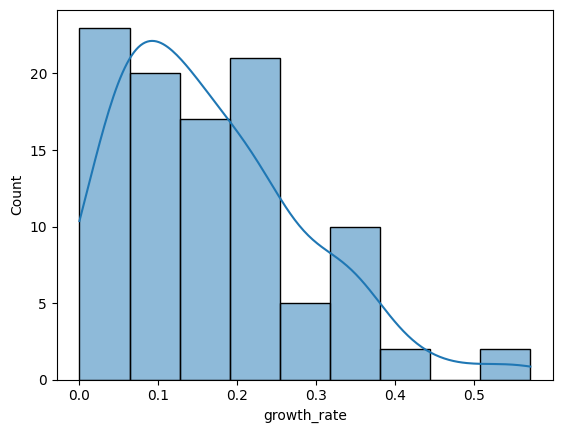

In [64]:
import seaborn as sns
sns.histplot(data=monodf, x='growth_rate', kde=True)

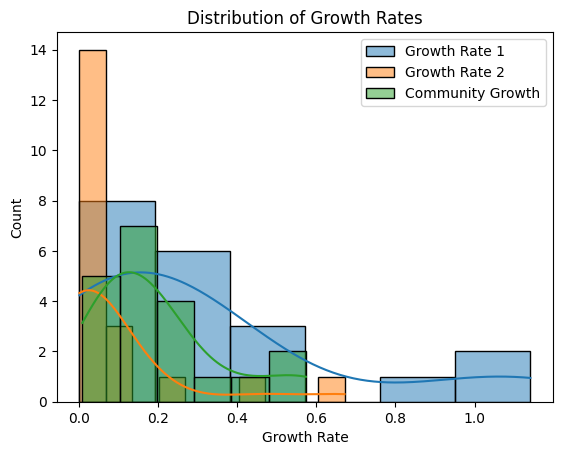

In [17]:
import matplotlib.pyplot as plt
sns.histplot(data=hdwestern, x='growth_rate1', kde=True, label='Growth Rate 1')
sns.histplot(data=hdwestern, x='growth_rate2', kde=True, label='Growth Rate 2')
sns.histplot(data=hdwestern, x='community_growth', kde=True, label='Community Growth')
plt.legend()
plt.xlabel('Growth Rate')
plt.ylabel('Count')
plt.title('Distribution of Growth Rates')
plt.show()

In [65]:
hdwestern = pd.read_csv('C:/Users/sabh/Desktop/jd_thesis/micom/new100/hdwestern.csv')
hdwestern.head()

,id_1,id_2,name_1,name_2,growth_rate1,growth_rate2,reactions_1,reactions_2,metabolites_1,metabolites_2,status,community_growth
0,12.0,73.0,Bacteroides_stercoris_ATCC_43183,Mycoplasma_pneumoniae_309,0.379259,0.210084,1286.0,507.0,1165.0,496.0,optimal,0.294672
1,72.0,73.0,Morganella_morganii_subsp_morganii_KT,Mycoplasma_pneumoniae_309,0.631726,0.030721,1761.0,507.0,1480.0,496.0,optimal,0.331224
2,78.0,93.0,Parabacteroides_merdae_ATCC_43184,Streptococcus_infantis_SK970,0.111820,0.479066,2495.0,1124.0,2170.0,1142.0,optimal,0.295443
3,34.0,90.0,Collinsella_stercoris_DSM_13279,Shigella_dysenteriae_Sd197,0.000000,0.909659,764.0,3054.0,728.0,2544.0,optimal,0.454829
4,73.0,100.0,Mycoplasma_pneumoniae_309,Yersinia_kristensenii_ATCC_33638,0.030721,0.498977,507.0,1884.0,496.0,1548.0,optimal,0.264849


In [66]:
hdwestern['axenic_1'] = hdwestern['id_1'].map(axenic_dict)
hdwestern['axenic_2'] = hdwestern['id_2'].map(axenic_dict)
hdwestern.head()
#hdwestern.to_csv("C:/Users/sabh/Desktop/jd_thesis/micom/hd_western.csv", index=False)

,id_1,id_2,name_1,name_2,growth_rate1,growth_rate2,reactions_1,reactions_2,metabolites_1,metabolites_2,status,community_growth,axenic_1,axenic_2
0,12.0,73.0,Bacteroides_stercoris_ATCC_43183,Mycoplasma_pneumoniae_309,0.379259,0.210084,1286.0,507.0,1165.0,496.0,optimal,0.294672,0.280471,0.015361
1,72.0,73.0,Morganella_morganii_subsp_morganii_KT,Mycoplasma_pneumoniae_309,0.631726,0.030721,1761.0,507.0,1480.0,496.0,optimal,0.331224,0.326384,0.015361
2,78.0,93.0,Parabacteroides_merdae_ATCC_43184,Streptococcus_infantis_SK970,0.111820,0.479066,2495.0,1124.0,2170.0,1142.0,optimal,0.295443,0.102359,0.114703
3,34.0,90.0,Collinsella_stercoris_DSM_13279,Shigella_dysenteriae_Sd197,0.000000,0.909659,764.0,3054.0,728.0,2544.0,optimal,0.454829,0.113126,0.216668
4,73.0,100.0,Mycoplasma_pneumoniae_309,Yersinia_kristensenii_ATCC_33638,0.030721,0.498977,507.0,1884.0,496.0,1548.0,optimal,0.264849,0.015361,0.249488


In [ ]:
ldwestern = pd.read_csv('C:/Users/sabh/Desktop/jd_thesis/micom/ldwestern.csv')
ldwestern['axenic_1'] = ldwestern['id_1'].map(axenic_dict)
ldwestern['axenic_2'] = ldwestern['id_2'].map(axenic_dict)
ldwestern.to_csv("C:/Users/sabh/Desktop/jd_thesis/micom/ld_western.csv", index=False)